In [29]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [56]:
data = df.copy()

In [57]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [41]:
df.set_index('CustomerID',inplace=True)

In [47]:
X = df.drop('Genre' , axis=1)

In [48]:
X

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


## the elbow methode


In [4]:
from sklearn.cluster import KMeans
SSE = []
for i in range (2,11):
    km=KMeans(n_clusters=i,max_iter=200,random_state=42)
    km.fit(df)
    SSE.append(km.inertia_)

c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [5]:
SSE

[212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51130.69008126376,
 44687.23553400547,
 40857.18667502089,
 37175.97669994118]

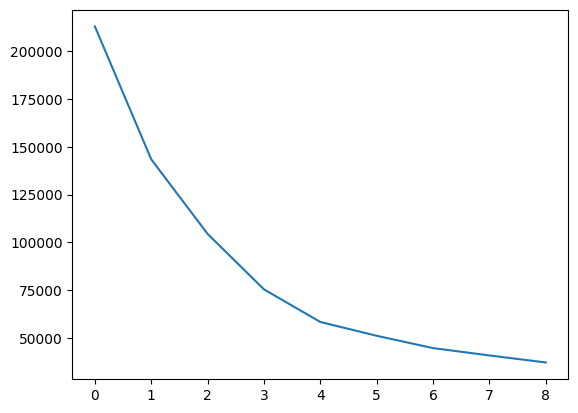

In [6]:
plt.plot(SSE)

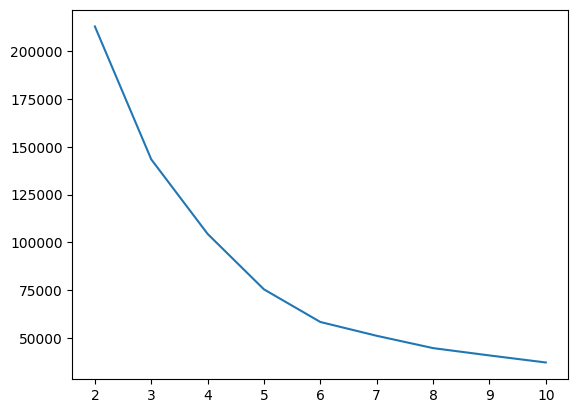

In [7]:
plt.plot(range(2,11) , SSE) #تعداد بهینه خوشه ها مشخص شد که 6 هستش با توجه به نمودار

In [8]:
kmeans=KMeans(n_clusters=6 , max_iter=200,random_state=42)
kmeans.fit(df)

c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=200, n_clusters=6, random_state=42)

In [9]:
cluster=kmeans.labels_ # لیستی در خروجی که دقیقا نشون میده هر داده در کدوم خوشه هستش

In [10]:
kmeans.cluster_centers_

array([[ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [11]:
dfcluster = df.assign(Clusterlable = cluster)

In [12]:
dfcluster[dfcluster['Clusterlable']==5]

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusterlable
CustomerID,,,,,
1,1,19,15,39,5
3,0,20,16,6,5
5,0,31,17,40,5
7,0,35,18,6,5
9,1,64,19,3,5
11,1,67,19,14,5
13,0,58,20,15,5
15,1,37,20,13,5
17,0,35,21,35,5


In [13]:
dfcluster 

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusterlable
CustomerID,,,,,
1,1,19,15,39,5
2,1,21,15,81,2
3,0,20,16,6,5
4,0,23,16,77,2
5,0,31,17,40,5
...,...,...,...,...,...
196,0,35,120,79,4
197,0,45,126,28,1
198,1,32,126,74,4


In [14]:
#Cluster lable =  الان کلاستر لیبل خودش یجورایی ویژگی هدف محسوب میشه و بقیه کار هارو روی اون میکنیم

In [15]:
dfcluster.groupby('Clusterlable').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Clusterlable,,,,
0,0.444444,56.155556,53.377778,49.088889
1,0.571429,41.685714,88.228571,17.285714
2,0.409091,25.272727,25.727273,79.363636
3,0.342105,27.000000,56.657895,49.131579
4,0.461538,32.692308,86.538462,82.128205
5,0.380952,44.142857,25.142857,19.523810


In [16]:
dfcluster.groupby('Clusterlable').size()

Clusterlable
0    45
1    35
2    22
3    38
4    39
5    21
dtype: int64

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(df , kmeans.labels_ , metric='euclidean')
#هر چی بیشتر باشه بهتره -ولی معمولا این تکنیک خوشه بندی برای مقایسه بین روش هاست

0.45205475380756527

In [50]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=4 , min_samples=4  )
db.fit(X)

DBSCAN(eps=4, min_samples=4)

In [51]:
db.labels_ #عملا نتونسته خوشه بندی انجام بده ینی همرو نویز تشخیص داده

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [26]:
x = df.values

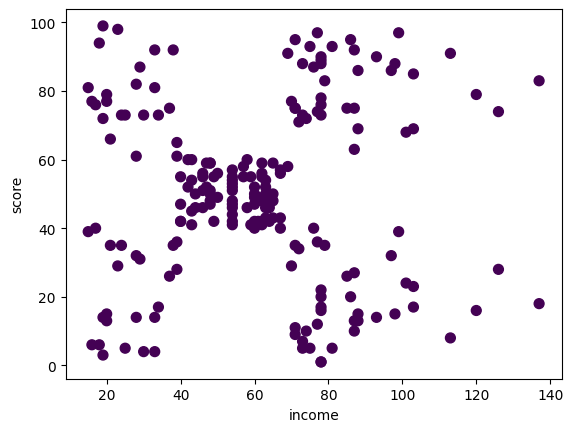

In [27]:
plt.scatter(x[:,2],x[:,3], c=db.labels_,s=50)

plt.xlabel('income')
plt.ylabel('score')

plt.show()

In [58]:
data.set_index('CustomerID',inplace=True)

In [59]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [64]:
x = data.iloc[:,[2,3]]

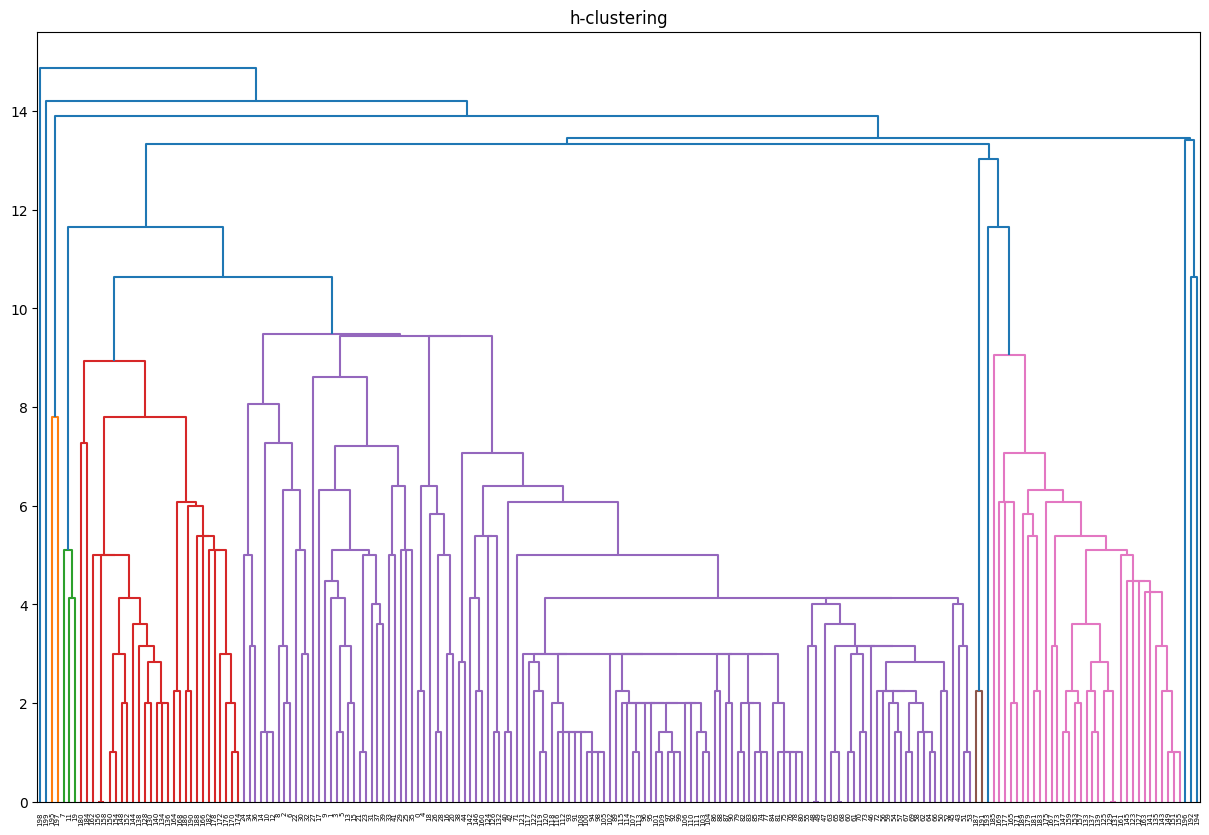

In [72]:
import scipy.cluster.hierarchy as  sch
ch1 = sch.linkage(x , method = 'single')
plt.figure(figsize=(15,10))
plt.title('h-clustering')
dend = sch.dendrogram(ch1)

In [87]:
from sklearn.cluster import AgglomerativeClustering
agclustring = AgglomerativeClustering(n_clusters=6 , linkage='ward' )
agclustring.fit(data)

AgglomerativeClustering(n_clusters=6)

In [88]:
agclustring.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [89]:
x = data.values

Text(0, 0.5, 'score')

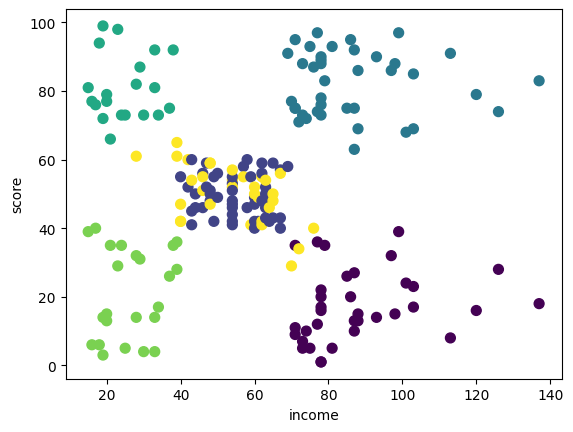

In [90]:
plt.scatter(x[:,2],x[:,3], c=agclustring.labels_,s=50)

plt.xlabel('income')
plt.ylabel('score')

In [91]:
from sklearn.metrics import silhouette_score
silhouette_score(data , agclustring.labels_ , metric='euclidean')

0.4428008535928764